In [23]:
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from IPython.display import Image as im
import glob
import pandas as pd

# WordClouds

In [24]:
raw_tweets = 'Hotel CARLUZ, Llego el fin de semana y te proponemos algunas alternativas para tu diversión . Tomar el sol  disfrutar de nuestras instalaciones o dar un tranquilo paseo al atardecer en la playa . ¡Te esperamos! pic.twitter.com/ahJKvUGtll'
raw_string = ''.join(raw_tweets)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 3]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]

In [25]:
list_airbnb = glob.glob(('*airbnb*.csv'))
list_hospedaje = glob.glob(('*hospedaje*.csv'))
list_hotel = glob.glob(('*hotel*.csv'))

In [26]:
def get_df(list_df):
    data_df = pd.DataFrame()
    for i in list_df:
        df = pd.read_csv(i,header=None)
        data_df = data_df.append(df)
    return data_df
airbnb_df = get_df(list_airbnb)
hospedaje_df = get_df(list_hospedaje)
hotel_df = get_df(list_hotel)

In [45]:
def sep_tweet(raw_tweets):
    raw_string = ''.join(raw_tweets)
    no_links = re.sub(r'http\S+', '', raw_string)
    no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
    no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
    words = no_special_characters.split(" ")
    words = [w for w in words if len(w) > 3]  # ignore a, an, be, ...
    words = [w.lower() for w in words]
    words = [w for w in words if w not in STOPWORDS]
    return words

In [67]:
def total_w(airbnb_df):
    total_words = airbnb_df[2].values
    total_terms = []
    for i in range(len(total_words)):
        total_terms.extend(sep_tweet(total_words[i]))
    return total_terms

# AirBNB Tweets Cloud

In [57]:
mask = np.array(Image.open('nike.jpeg'))

In [50]:
wc = WordCloud(background_color="white", max_words=6000, mask=mask)
clean_string = ','.join(total_terms)
wc.generate(clean_string)

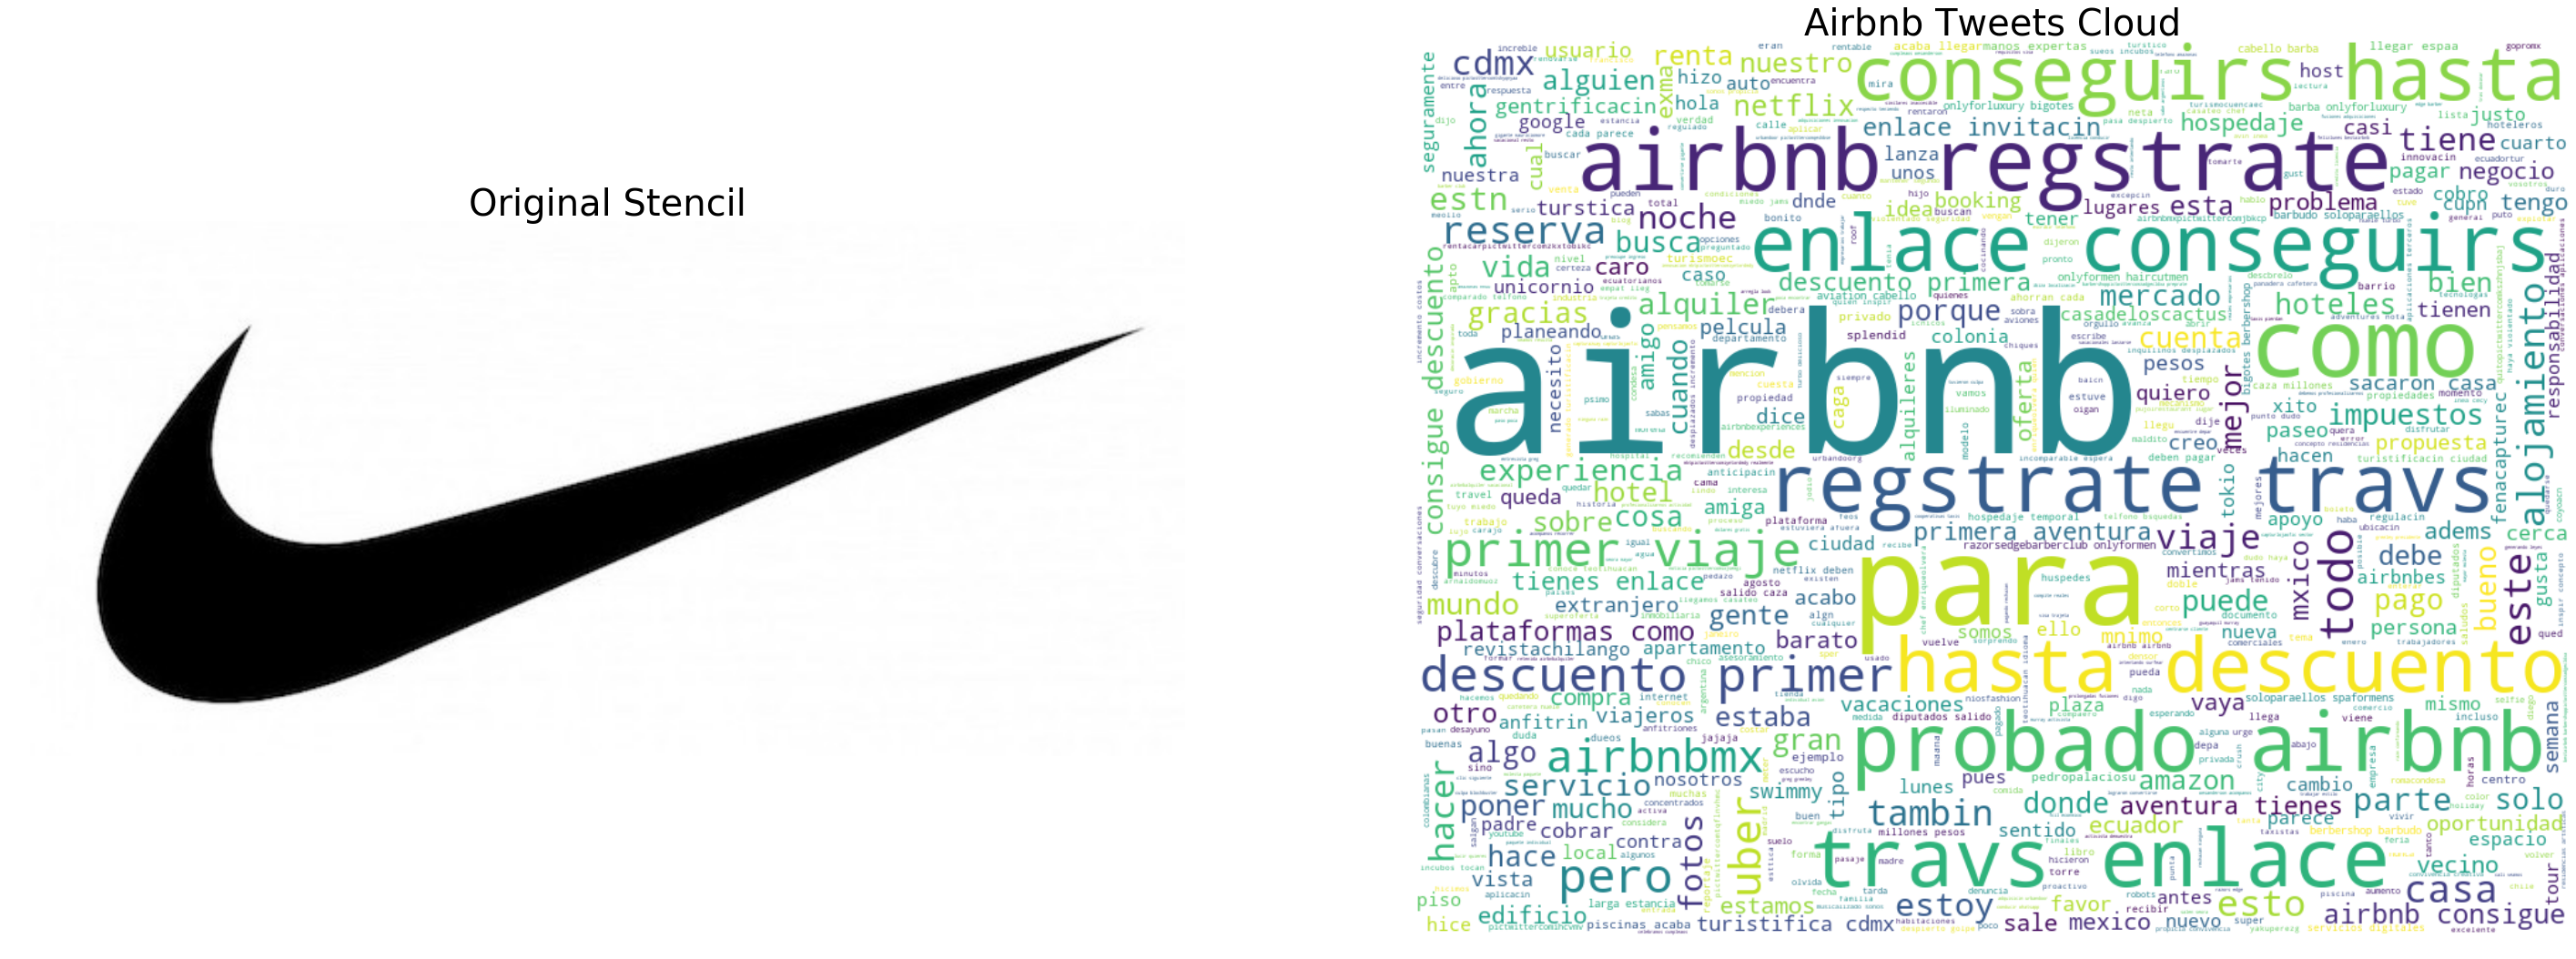

In [75]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Airbnb Tweets Cloud', size=40)
plt.axis("off")
plt.show()

# Hospedajes Tweets Cloud

In [68]:
total_hospedaje = total_w(hospedaje_df)

In [69]:
wc1 = WordCloud(background_color="white", max_words=6000, mask=mask)
clean_string = ','.join(total_hospedaje)
wc1.generate(clean_string)

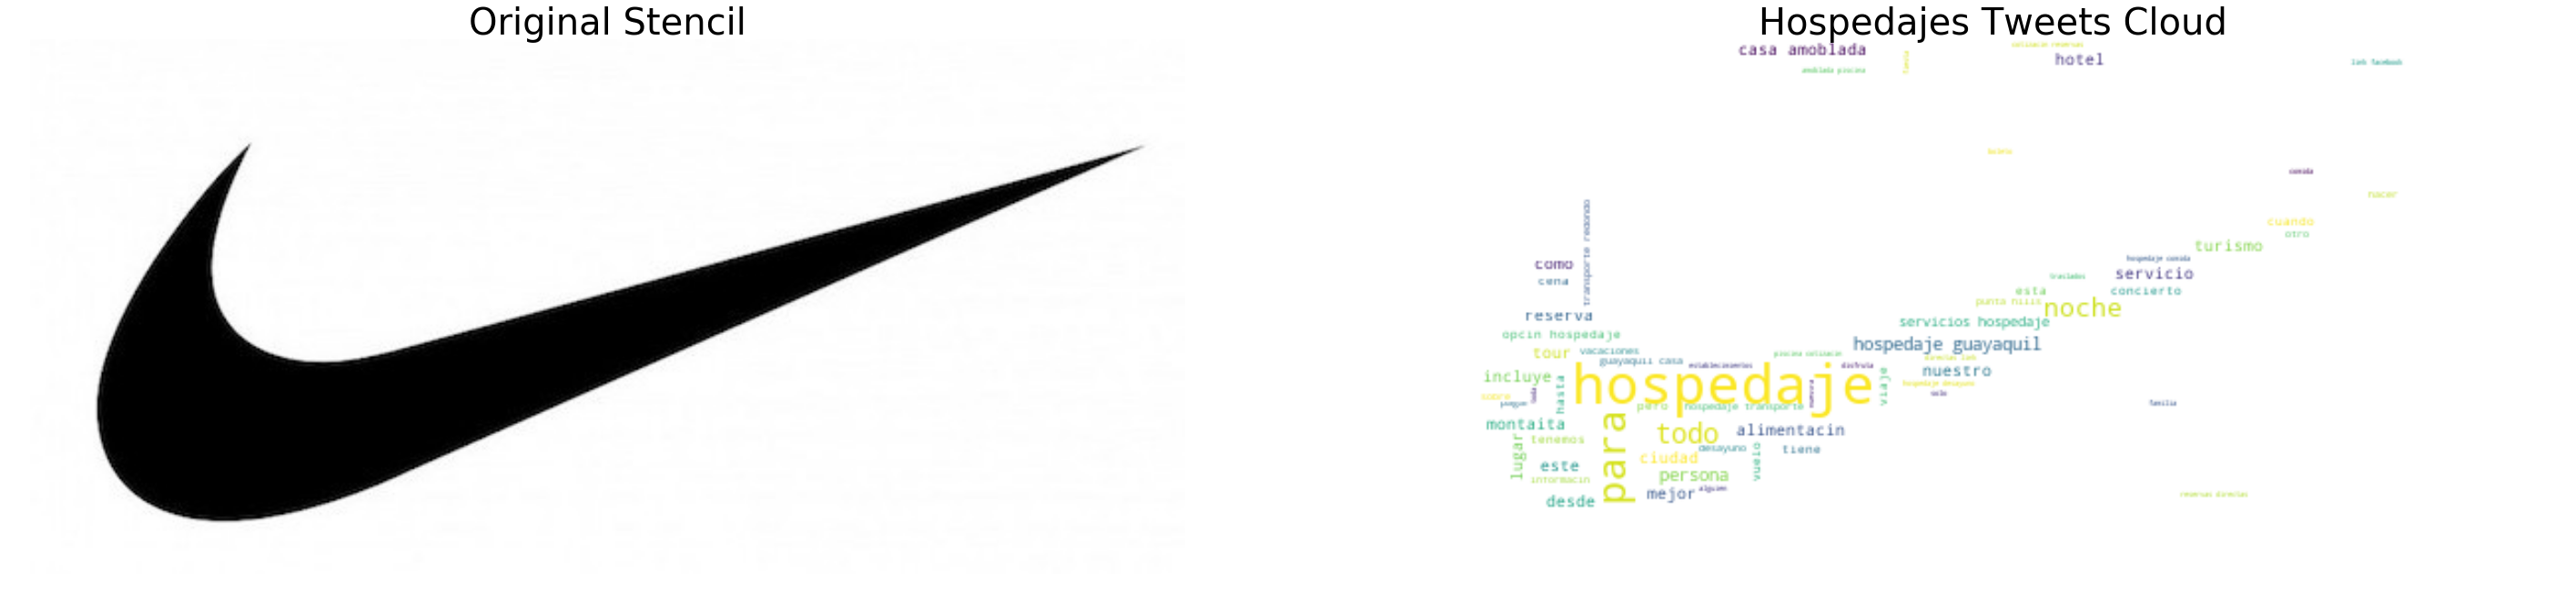

In [70]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc1, interpolation='bilinear')
plt.title('Hospedajes Tweets Cloud', size=40)
plt.axis("off")
plt.show()

# Hoteles Tweets Cloud

In [71]:
total_hotel = total_w(hotel_df)

In [72]:
wc2 = WordCloud(background_color="white", max_words=6000, mask=mask)
clean_string = ','.join(total_hotel)
wc2.generate(clean_string)

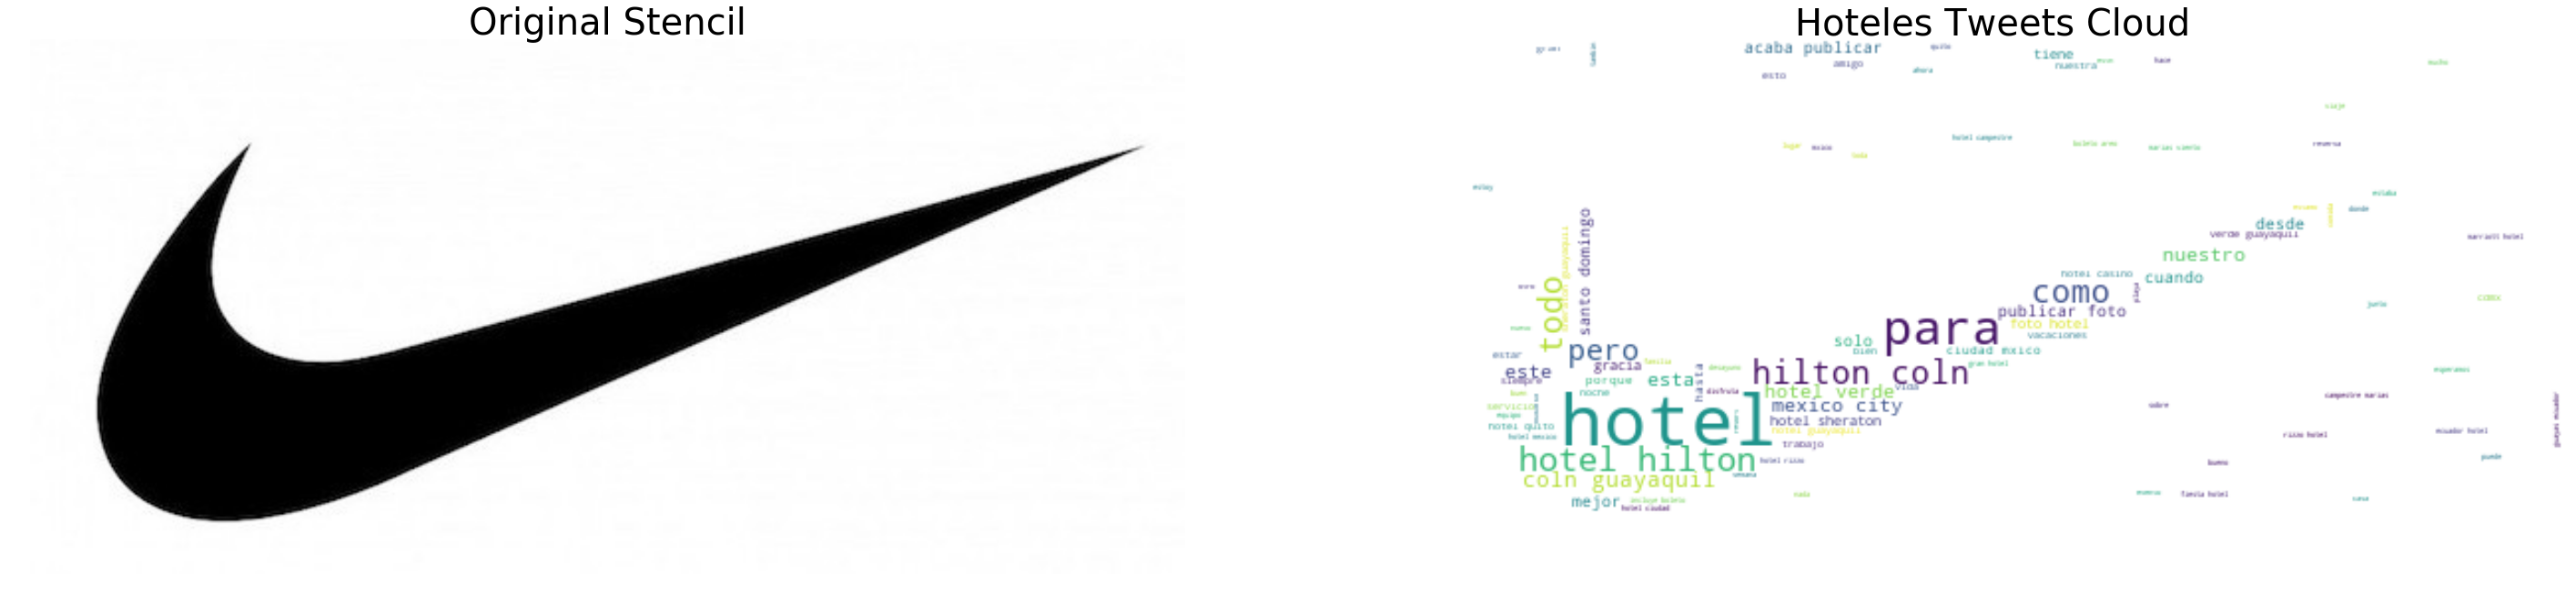

In [74]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Stencil', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc2, interpolation='bilinear')
plt.title('Hoteles Tweets Cloud', size=40)
plt.axis("off")
plt.show()